# 23. A/B Testing a Category Variable with 2 Levels

In [41]:
from datascience import *
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from scipy import stats

We will continue to work with a subset of the `personality` table called `pers`. This time, however, we will focus on a category variable `AccDate` the responses to which are Yes/No based on this question. "At a time in your life when you are not involved with anyone, someone asks you out. This person has a great personality, but you do not find this person physically attractive. Do you accept the date?"

For the special case of a category variable with only two levels, we can use A/B testing. Since the test statistic is slightly different, the process will be quite similar to but not exactly like typical A/B tests with numeric variables.

In [42]:
pers = Table.read_table('http://faculty.ung.edu/rsinn/perfnarc.csv')
pers.show(5)

Sex,G21,Greek,AccDate,Stress1,Stress2,Perf,Narc
F,N,N,N,9,7,99,3
F,Y,N,Y,11,13,86,2
F,N,Y,N,15,14,118,4
F,N,N,Y,16,15,113,2
F,Y,N,Y,17,17,107,8


In [43]:
date = pers.select('Sex','AccDate')
date

Sex,AccDate
F,N
F,Y
F,N
F,Y
F,Y
F,N
F,N
F,Y
F,Y
F,Y


## Does sex affect Yes/No response to dating question?

A pivot table is the perfect data summary to reflect the difference in responses based on biological sex.

In [58]:
date.pivot('AccDate','Sex')

Sex,N,Y
F,33,52
M,31,32


### Steps in the hypothesis test

1. **Null hypothesis.** The grouping variable is independent of the response variable.
2. **Alternate hypothesis.** The response variable depends upon the grouping variable.
3. **Test statistic**. Simulated number of female Yes responses.
4. Simulate test statistic distribution with sample of 85 responses drawn without replacement.
5. Calculate **$p$-value**, e.g. the probability the null hypothesis is true.
6. **Statistical Conclusion.** If $p<0.05$, reject null. Else, fail to reject null.
7. **Real world implications.** State the results of hypothesis test in real world terms.

### Simulating the null hypothesis

The null hypothesis is that a person's Yes/No response to the dating question is independent of their biological sex. There are 85 female responses. If sex has no bearing on the response, then repeated random draws of 85 responses should reveal whether 52 Yes responses in that group is typical. 

As with the `ab_shuffle` function for A/B testing, the draws must be without replacement.

In [44]:
date.sample(85, with_replacement = False)

Sex,AccDate
M,Y
F,N
F,N
F,N
F,Y
M,N
F,N
F,Y
M,N
F,N


Our plan is to draw 85 random responses (without replacement) and record the number of Yes responses ignoring biological sex.

In [45]:
new_samp = date.sample(85, with_replacement = False).column(1)
new_samp

array(['N', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N',
       'N', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'N', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y',
       'N', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N',
       'N', 'Y', 'N', 'Y', 'N', 'Y', 'N'], dtype='<U1')

In [46]:
sum(new_samp == 'Y')

49

We now recalculate the statistic a few thousand times with our standard `for` loop setup.`m

In [50]:
yes_count = make_array()

# Set reps to 2,000 or less especially if working the cloud
reps = 50000

for i in range(reps):
    new_samp = date.sample(85, with_replacement = False).column(1)
    new_count = sum(new_samp == 'Y')
    yes_count = np.append(yes_count,new_count)

# Remove hashtag comment below to see the results array
# yes_count

### Results

We can use the `ab_hist` function to display a histogram of the simulated distribution for the statistic and compare 52, the observed number of Yes responses, to it.

In [52]:
def ab_hist(myArray, observed_value):
    tab = Table().with_column('A/B Differencs',myArray)
    tab.hist(0)
    _ = plots.plot([observed_value, observed_value], [0, 0.1], color='red', lw=2)

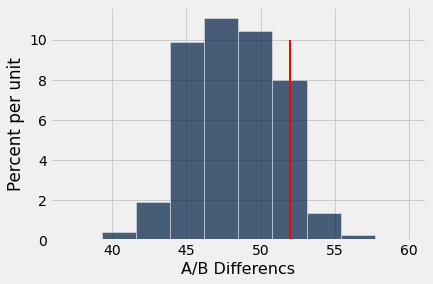

In [53]:
ab_hist(yes_count,52)

In [55]:
p_value = sum( yes_count >= 52) / reps
p_value

0.1383

Because the $p$-value is greater than 0.05, we fail to reject the null hypothesis. We have no evidence that Yes/No responses to the dating question depend on biological sex.

In [ ]:
## Dolphin study example

